In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
from scipy.stats import norm

# 二次元正規分布

$x = \begin{pmatrix}
x_1 \\
x_2 \\
\end{pmatrix}
, \mu = \begin{pmatrix}
\mu_1 \\
\mu_2 \\
\end{pmatrix}
, \Sigma = \begin{pmatrix}
\sigma_1^2 & \sigma_{12} \\
\sigma_{12} & \sigma_2^2\\
\end{pmatrix}$
とする. このとき二次元正規分布の確率密度関数は次で与えられる.

$$ p(x | \mu,\Sigma) = \frac{1}{2\pi |\Sigma|^{\frac{1}{2}}}e^{-\frac{1}{2} {}^t(x-\mu)\Sigma^{-1}(x-\mu)}$$

<IPython.core.display.Javascript object>


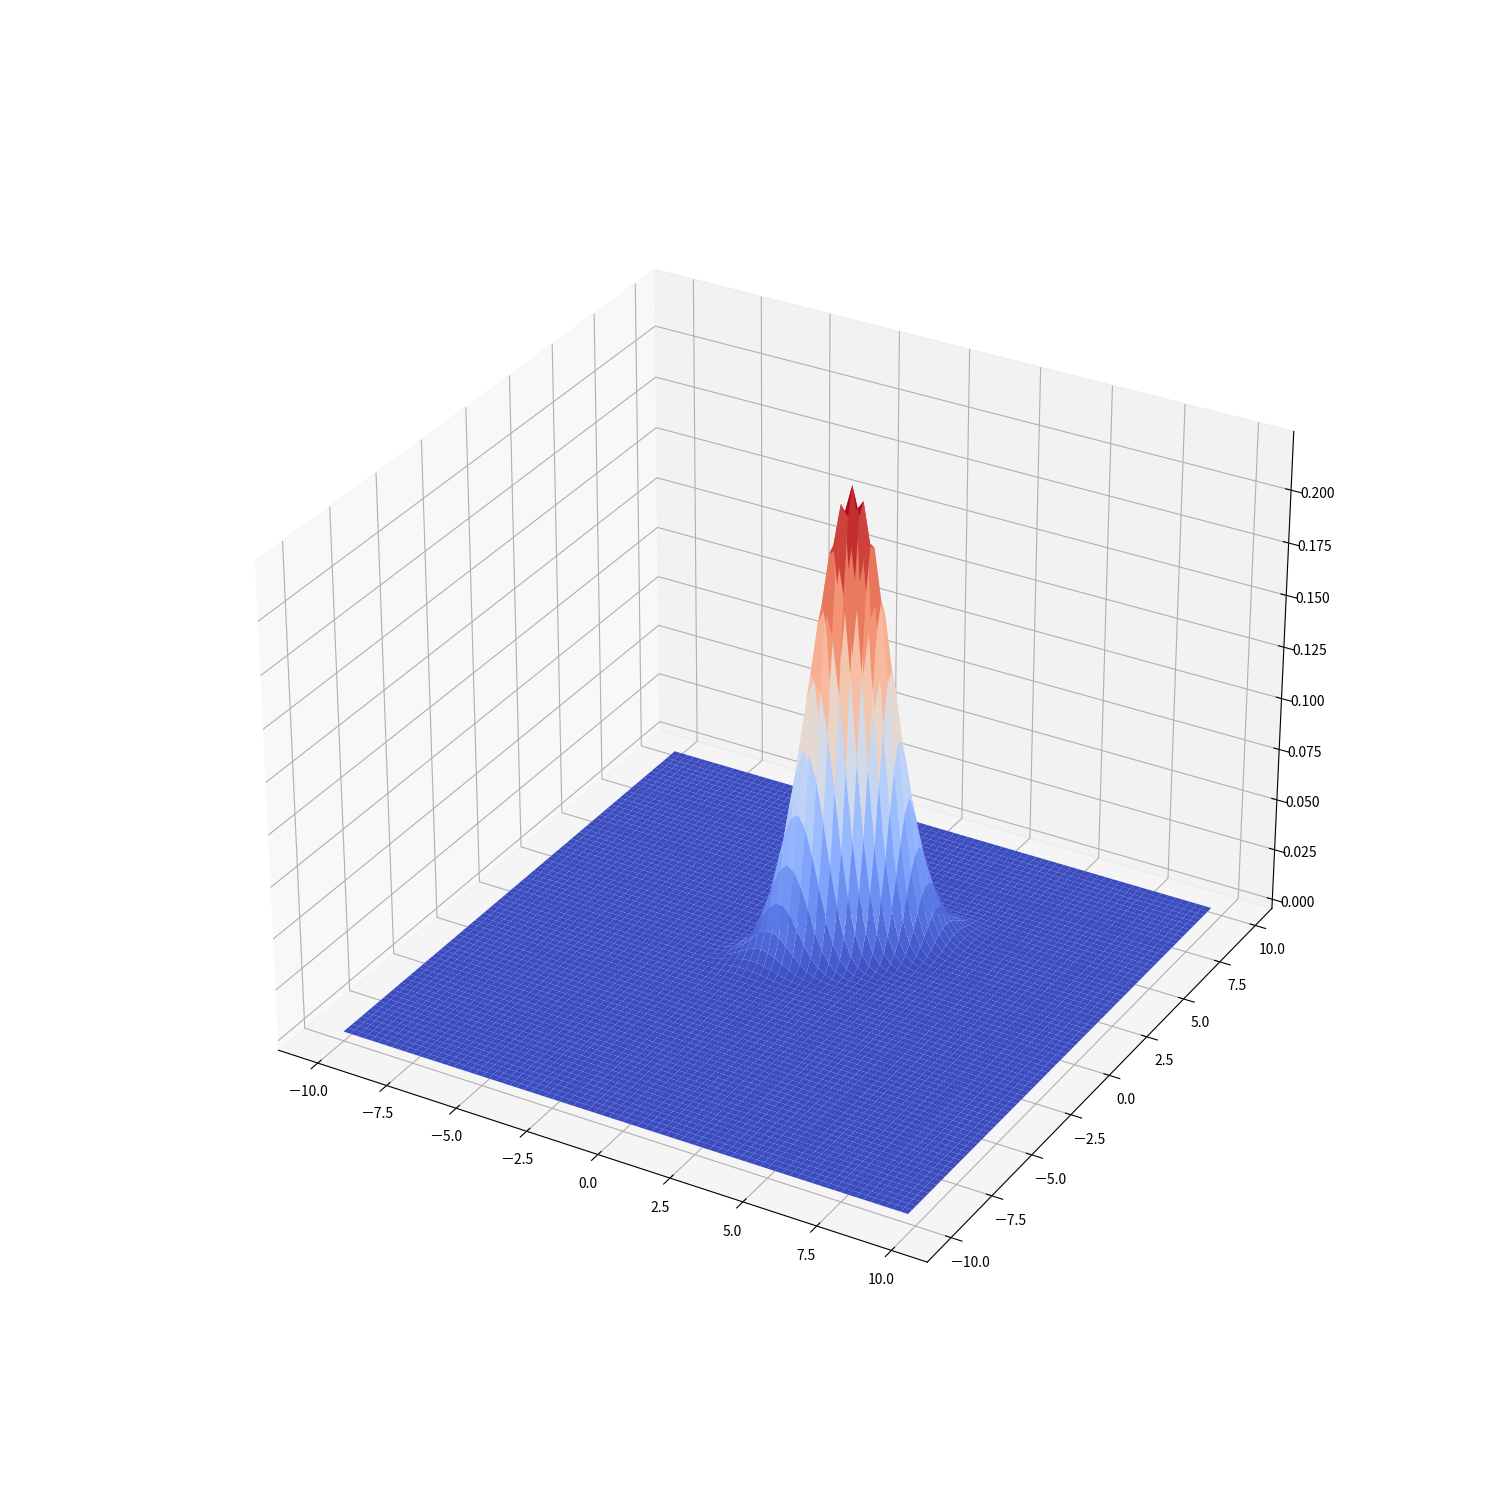

In [13]:
%matplotlib notebook

# 二次元正規分布のpdfのプロット

def gaussian(x,mu,sigma):
    # 分散共分散行列の行列式
    det = np.linalg.det(sigma)
    #分散共分散行列の逆行列
    inv = np.linalg.inv(sigma)
    n = x.ndim
    return np.exp(-np.diag((x - mu)@inv@(x - mu).T)/2.0) / (np.sqrt((2 * np.pi) ** n * det))


x = np.arange(-10,10,0.25)
y = np.copy(x)
X,Y = np.meshgrid(x,y)

# np.c_ : 配列の結合
z = np.c_[X.ravel(),Y.ravel()]

mu = np.array([1,2])
sigma = np.array([[1,0.7],[0.7,1]])

Z = gaussian(z,mu,sigma)
Z = Z.reshape(X.shape)
fig = plt.figure(figsize = (15, 15),facecolor="white")
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, rstride=1, cstride=1,cmap=cm.coolwarm)
plt.show()

# Gibbs sampling

二次元正規分布からギブスサンプリングを行うプログラムを作成する.

In [2]:
def gibbs_sampling(mu,sigma,sample_size):
    samples = [] # 結果を格納
    mu1 = mu[0]
    mu2 = mu[1]
    var1 = sigma[0,0]
    var2 = sigma[1,1]
    cov = sigma[1,0]
    start = [0,0] # 初期位置
    samples.append(start)
    
    for i in range(sample_size):
        prev_sample = samples[-1][:] # 一つ前のサンプルを取得
        # x1を生成
        mu1_new = mu1+cov*(prev_sample[1]-mu2)
        var1_new = var1-cov**2
        x1 = norm.rvs(loc=mu1_new,scale=np.sqrt(var1_new))
        
        # x2を生成
        mu2_new = mu2+cov*(x1-mu1)
        var2_new = var2-cov**2
        x2 = norm.rvs(loc=mu2_new,scale=np.sqrt(var2_new))
        samples.append([x1,x2])
        
    return np.array(samples)

<IPython.core.display.Javascript object>


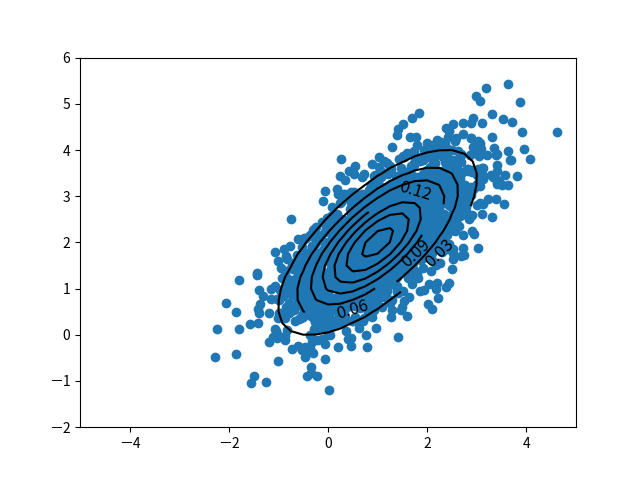

In [18]:
mu = np.array([1,2])
sigma = np.array([[1,0.7],[0.7,1]])
sample_size = 2000

samples = gibbs_sampling(mu,sigma,sample_size)

plt.figure(facecolor="white")
plt.scatter(samples[:,0],samples[:,1])
# 等高線
cont = plt.contour(X, Y, Z,colors=['black'])
cont.clabel(fmt='%1.2f', fontsize=12)
plt.xlim(-5,5)
plt.ylim(-2,6)
plt.show()

# scipyの多次元正規分布と比較

In [63]:
from scipy.stats import multivariate_normal

<IPython.core.display.Javascript object>


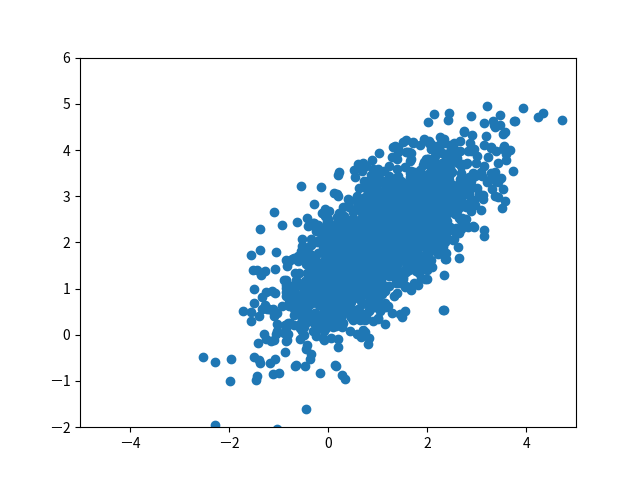

In [66]:
scipy_randoms =  multivariate_normal.rvs(mean=mu,cov=sigma,size=sample_size)

plt.figure(facecolor="white")
plt.scatter(scipy_randoms[:,0],scipy_randoms[:,1])
plt.xlim(-5,5)
plt.ylim(-2,6)
plt.show()